# Tutorial exercises

In the tutorial you will be analysing data (real but edited) from the 2021 General Social Survey from the USA.  The General Social Survey is a regular survey of the population of the United States that gathers information on people’s opinions. The sample is intended to be representative of the adult population. The outcome variable of interest (‘afraid’) is whether people feel afraid to walk in their neighbourhoods at night. The question wording was as follows: "Is there any area around your home--that is, within a mile--where you would be afraid to walk alone at night?" The answer options are yes (1) or no (0). (Some people also answered “don’t know” but these are set to missing).

The $x$ variables are as follows

* Sex (male, female)
* Age (in years)
* Race of respondent (white, black, other)
* Born (whether respondent was born in the USA, yes or no)
* Raclive (a binary variable indicating whether the neighbourhood is racially mixed).
* Educ (education measured in years of education, where more years assumes higher educational qualifications)
* Income (an ordinal variable of household income, where higher values mean higher incomes. Treat as continuous for this analysis)


### Set up Python libraries

Copy an appropriate code cell below, and run it, to import the relevant Python libraries


In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Import and view the data

The data are in file fear.csv - download them and import them as a dataframe called `fear`

In [2]:
# your code here
fear=pandas.read_csv('../data/fear.csv')
fear

,age,educ,sex,race,born,income,raclive,afraid
0,65.0,12.0,female,white,yes,NaN,no,0.0
1,60.0,16.0,male,white,yes,26.0,no,0.0
2,NaN,NaN,NaN,white,NaN,NaN,yes,1.0
3,NaN,NaN,NaN,white,NaN,NaN,yes,1.0
4,NaN,14.0,female,black,no,NaN,yes,0.0
...,...,...,...,...,...,...,...,...
4027,21.0,14.0,female,white,yes,8.0,yes,1.0
4028,29.0,16.0,female,white,yes,23.0,yes,0.0
4029,NaN,16.0,female,other,no,26.0,yes,0.0
4030,68.0,20.0,female,white,yes,2.0,yes,1.0


### Designing the model

Before running your first logistic regression model, think about your expectations here. 

* Would you expect men or women to be more afraid of walking in their neighbourhoods at night? 
* And would you expect older or younger people to feel more afraid? 

Let’s test these associations between age and sex with fear of walking in neighbourhoods. Run a logistic regression model with $y$ = afraid, $x$ = sex + age.


In [3]:
# create the logistic regression model and fit it
logistic_model = smf.logit('afraid ~ sex + age', data=fear).fit()

# print out the summary table
logistic_model.summary()

Optimization terminated successfully.
         Current function value: 0.621675
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 afraid   No. Observations:                 3680
Model:                          Logit   Df Residuals:                     3677
Method:                           MLE   Df Model:                            2
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                 0.04030
Time:                        10:30:07   Log-Likelihood:                -2287.8
converged:                       True   LL-Null:                       -2383.8
Covariance Type:            nonrobust   LLR p-value:                 1.884e-42
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3946      0.115      3.421      0.001       0.169       0.621
sex[T.male]    -0.8808      0.073    -12.000      0.000      -1.025      -0.737
age            -0.0126      0.002     -6.078      0.000      -0.017      -0.009
===============================================================================
"""

### Interpret the output. 

* Which coefficients are statistically significant? 
* Is the direction of effect as expected? 
* Find the p-value for the log-likelihood ratio. 
* Is this model statistically significant compared to the baseline model?



The effect of sex and age are significant:

* Males are less likely to be afraid than females (p<0.0005)
* older people are less likely to be afraid (negative log odds) - (p<0.0005)


The model is statistically significant (model LLR p-Value is $1.8 * 10^{-42}$)


### Make predictions

Compute the predicted probability that a 65-year-old woman reports feeling afraid. 

In [4]:
vals = dict(sex='female', age=65)

# Code for calculating predicted probability
logistic_model.predict(vals)

0    0.394791
dtype: float64

probability she feels afraid is 39%

### Control variables

Run a second logistic regression model. Keep age and sex in the model, and add race, born, raclive. and educ. (We are treating educ as a continuous variable). Print the coefficients as odds ratios.

In [5]:
# create the logistic regression model and fit it
logistic_model = smf.logit('afraid ~ sex + age + race + born + raclive + educ', data=fear).fit()

# print out the summary table
logistic_model.summary()

Optimization terminated successfully.
         Current function value: 0.613380
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 afraid   No. Observations:                 3224
Model:                          Logit   Df Residuals:                     3216
Method:                           MLE   Df Model:                            7
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                 0.05903
Time:                        10:30:07   Log-Likelihood:                -1977.5
converged:                       True   LL-Null:                       -2101.6
Covariance Type:            nonrobust   LLR p-value:                 6.954e-50
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5248      0.293      1.790      0.073      -0.050       1.099
sex[T.male]       -0.8956      0.079    -11.287      0.000      -1.051      -0.740
race[T.other]     -0.0796      0.169     -0.472      0.637      -0.410       0.251
race[T.white]     -0.2322      0.113     -2.049      0.040      -0.454      -0.010
born[T.yes]       -0.3149      0.130     -2.428      0.015      -0.569      -0.061
raclive[T.yes]     0.8214      0.113      7.288      0.000       0.600       1.042
age               -0.0104      0.002     -4.527      0.000      -0.015      -0.006
educ              -0.0290      0.014     -2.099      0.036      -0.056      -0.002
==================================================================================
"""

### Interpretation

Find the odds ratio for each preditor variable

In [6]:
# convert log odds to odds ratios
np.exp(logistic_model.params)

Intercept         1.690118
sex[T.male]       0.408383
race[T.other]     0.923444
race[T.white]     0.792797
born[T.yes]       0.729879
raclive[T.yes]    2.273612
age               0.989671
educ              0.971371
dtype: float64

Make a few notes on the findings using the odds ratios. How would you report the size of the effect using the odds ratios?

* males are 59% less likely to be afraid than females (odds ratio = 0.41)
* people whose race is not bblack are less likely to be afraid - for other, 8% less likely; for white, 21%
* people who were born in the USA are 28% less likely to be afraid
* people in racially mixed neighbourhoods are 127% more likely to be afraid
* for each year of age, people are 1% less likely to be afraid
* for each year of eductaion, people are 3% less likely to be afraid

How good is this second model? Check the proportion of cases correctly classified.

In [7]:
# Get predicted values for each row of the dataframe
yhat = logistic_model.predict(fear[['sex','age','race','born','raclive','educ']])

# add column to the dataframe with the probability, and another with the binary prediction
fear['yhat']=yhat
fear['prediction']=(yhat>0.5)
# manually set prediction to NaN if yhat is NaN
fear.loc[np.isnan(fear.yhat),'prediction']=np.nan

# work out proportion correctly classified
# a participant (row) is correctly classified if columns 'evolved' and 'prediction' match
fear['correct'] = 0
fear.loc[(fear.afraid==fear.prediction), 'correct']=1
# manually set 'correct' to NaN if yhat is NaN or if 'afraid' is NaN
fear.loc[np.isnan(fear.yhat),'correct']=np.nan
fear.loc[np.isnan(fear.afraid),'correct']=np.nan

fear.correct.sum()/fear.correct.count() # use df.count() to count non-nan values for denominator here

/var/folders/ft/hqqrzz3d29xfyct7ct4630x00000gt/T/ipykernel_8817/3884839243.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  fear.loc[np.isnan(fear.yhat),'prediction']=np.nan


0.651985111662531

65% are correctly classified

### Control for income

Run a third logistic regression model adding a control variable for income. Request the output in odds ratios again

In [8]:
# create the logistic regression model and fit it
logistic_model = smf.logit('afraid ~ sex + age + race + born + raclive + educ + income', data=fear).fit()

# print out the summary table
logistic_model.summary()

# convert log odds to odds ratios
np.exp(logistic_model.params)

Optimization terminated successfully.
         Current function value: 0.606812
         Iterations 5


Intercept         2.203556
sex[T.male]       0.425394
race[T.other]     0.973385
race[T.white]     0.833071
born[T.yes]       0.681793
raclive[T.yes]    2.434267
age               0.988777
educ              0.986466
income            0.972864
dtype: float64

/opt/anaconda3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


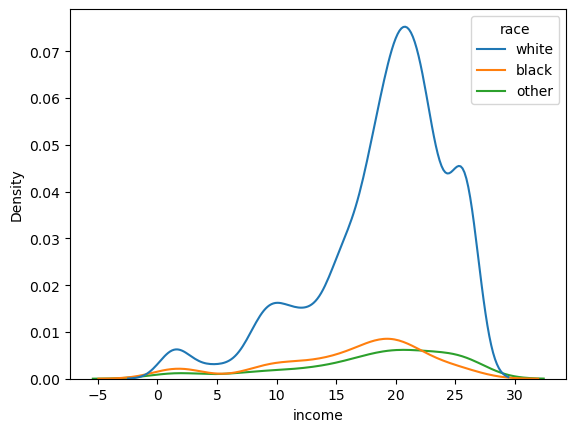

In [9]:
sns.kdeplot(data=fear, x='income', hue='race')
plt.show()

Interpret the results carefully. Do any of your conclusions change now that we are controlling for income? (Compare the coefficients in model 2 and model 3). Why do you think this might be?

HIgher incomes mean you are less likely to be afraid

When income is included as a control variable, the effects of education and race are reduced, suggesting these effect is partly 'explained away' (mediated) by income (ie people who are educated and non-black have higher incomes and this partly explains why they are less likely to be afraid)

The effects of being Male, born in the USA and 'raclive' are increased when income is included as a control variable.  

We can understand this better with the help of plots. 

Males are less afraid than females at all income levels, but males are more likely to have high incomes (which also makes you less afraid). Therefore when income was not taken into account, the benefit of being male was 

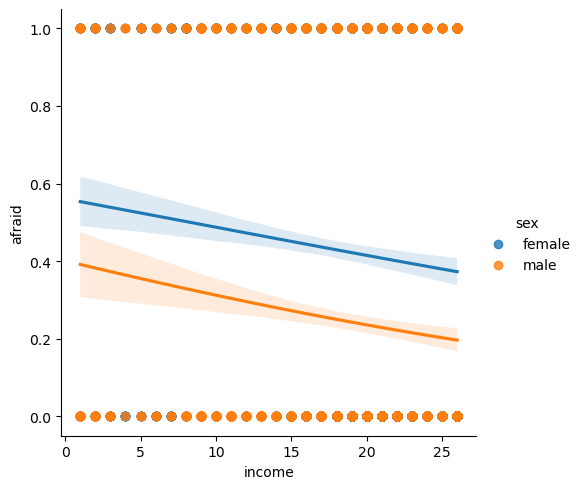

In [10]:
sns.lmplot(data=fear, x='income', y='afraid', hue='sex', logistic=True)
plt.show()

/opt/anaconda3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


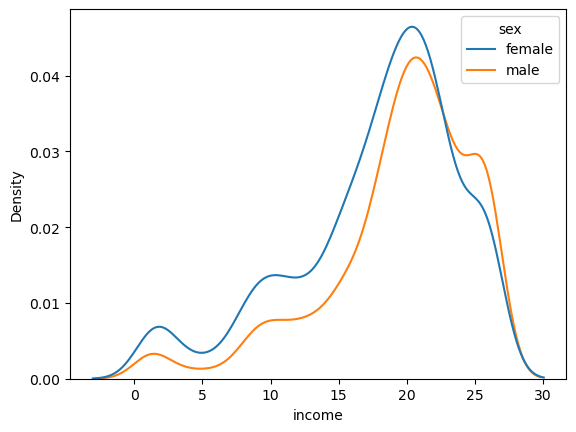

In [11]:
sns.kdeplot(data=fear, x='income', hue='sex')
plt.show()

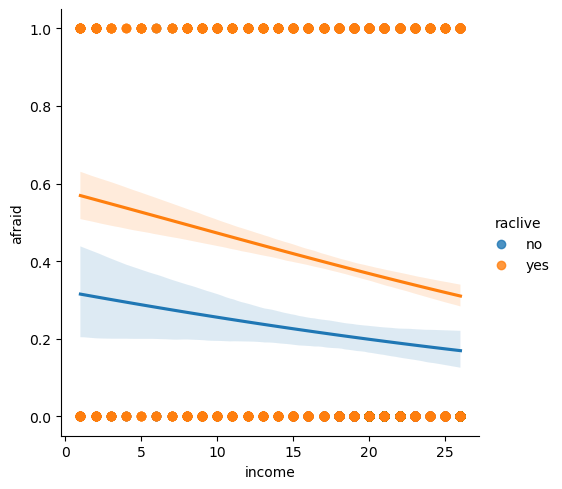

In [12]:
sns.lmplot(data=fear, x='income', y='afraid', hue='raclive', logistic=True)
plt.show()

/opt/anaconda3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


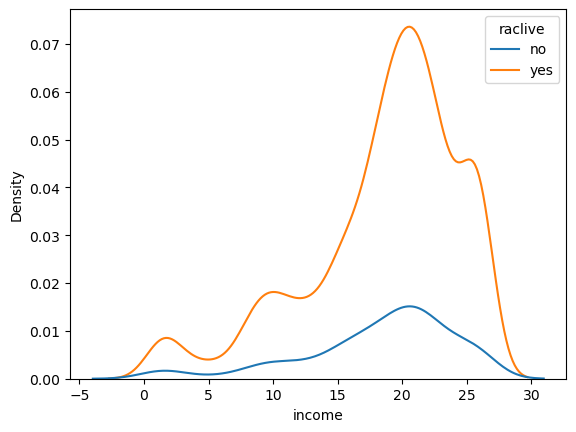

In [13]:
sns.kdeplot(data=fear, x='income', hue='raclive')
plt.show()